# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as skm
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1183847 #replace with your ID
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255

Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)

#making sure that each label is present at least 10 times in training
if np.all(freqs>10)==False:
    for item in freqs:
        while item<10:
            X = X[permutation]
            y = y[permutation]
    
            X_train, X_test = X[:m_training], X[m_training:]
            y_train, y_test = y[:m_training], y[m_training:]


print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [40 47 48 51 48 52 48 56 60 50]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


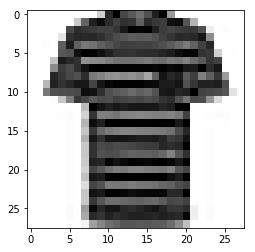

LABEL: 0
INPUT:


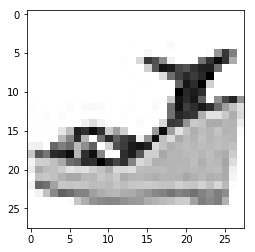

LABEL: 5
INPUT:


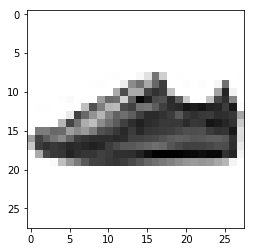

LABEL: 7
INPUT:


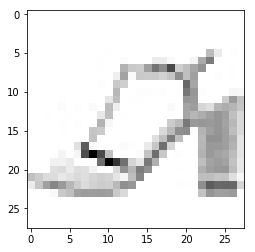

LABEL: 5


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)
plot_input(X_test,y_test,10000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 5-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

#grid of parameters for your SVC
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], 'kernel': ['poly']},
 ]


# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


supp_vc=SVC(kernel="linear")
classifier=GridSearchCV(supp_vc, param_grid=parameters, cv=5,return_train_score=True)
classifier.fit(X_train,y_train)


print ("RESULTS FOR LINEAR KERNEL")
print("Best parameters set found:", classifier.best_params_)
print("\n")

print("Score with best parameters:", classifier.best_score_)
print("\n")

print("All scores on the grid:")
scores=pd.DataFrame(classifier.cv_results_)
scores[["param_C","mean_test_score"]]

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.1}


Score with best parameters: 0.814


All scores on the grid:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_C,mean_test_score
0,0.001,0.546
1,0.01,0.776
2,0.1,0.814
3,1,0.810
4,10,0.810
5,100,0.810


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
supp_vc=SVC(kernel="poly",degree=2)
classifier=GridSearchCV(supp_vc, param_grid=parameters, cv=5,return_train_score=True)
classifier.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", classifier.best_params_)
print("\n")

print("Score with best parameters:", classifier.best_score_)
print("\n")

print("All scores on the grid:")
scores=pd.DataFrame(classifier.cv_results_)
scores[["param_C","param_gamma","mean_test_score"]] #I chose mean_test_score because we are interested in the 
                                                    #performance over the test set.    

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 1.0}


Score with best parameters: 0.79


All scores on the grid:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_C,param_gamma,mean_test_score
0,0.01,0.01,0.174
1,0.01,0.1,0.736
2,0.01,1,0.790
3,0.1,0.01,0.632
4,0.1,0.1,0.782
5,0.1,1,0.790
6,1,0.01,0.736
7,1,0.1,0.790
8,1,1,0.790


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of higher degree kernel
degree = 3

supp_vc=SVC(kernel="poly",degree=3)
classifier=GridSearchCV(supp_vc, param_grid=parameters, cv=5,return_train_score=True)
classifier.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:", classifier.best_params_)
print("\n")

print("Score with best parameters:", classifier.best_score_)
print("\n")

print("All scores on the grid:")
scores=pd.DataFrame(classifier.cv_results_)
scores[["param_C","param_gamma","mean_test_score"]]

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 0.1, 'gamma': 0.1}


Score with best parameters: 0.762


All scores on the grid:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_C,param_gamma,mean_test_score
0,0.01,0.01,0.338
1,0.01,0.1,0.730
2,0.01,1,0.752
3,0.1,0.01,0.592
4,0.1,0.1,0.762
5,0.1,1,0.752
6,1,0.01,0.718
7,1,0.1,0.752
8,1,1,0.752


## TO DO4 
### What do you observe when fitting a higher degree polynomial on this dataset?

It turns out that the higher the degree of the polynomial chosen for the kernel, the lower the best score gets. This translates into the fact that the linear kernel is best at predicting over the test set.

## TO DO 5
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.01,0.1]}

#run SVM with rbf kernel
supp_vc=SVC(kernel="rbf")
classifier=GridSearchCV(supp_vc, param_grid=parameters, cv=5,return_train_score=True)
classifier.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')
print("Best parameters set found:", classifier.best_params_)
print("\n")

print("Score with best parameters:", classifier.best_score_)
print("\n")

print("All scores on the grid:")
scores=pd.DataFrame(classifier.cv_results_)
scores[["param_C","param_gamma","mean_test_score"]]

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01}


Score with best parameters: 0.81


All scores on the grid:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_C,param_gamma,mean_test_score
0,0.1,0.001,0.132
1,0.1,0.01,0.540
2,0.1,0.01,0.540
3,0.1,0.1,0.120
4,1,0.001,0.682
5,1,0.01,0.774
6,1,0.01,0.774
7,1,0.1,0.552
8,10,0.001,0.798
9,10,0.01,0.810


## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
#ANSWER: the best SVM kernel for me is the LINEAR one
best_SVM = SVC(C=0.1,kernel="linear")
best_SVM.fit(X_train,y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.032000
Best SVM test error: 0.215546


## More data
Now let's do the same but using more data points for training.

### TO DO 7
Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 30000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [3032 3030 2967 2996 2975 2970 3009 2992 3046 2983]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

In [14]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C=0.1,kernel="linear")  #maybe this line is unnecessary
best_SVM.fit(X_train,y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.103767
Best SVM test error: 0.137667


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

In [15]:
from sklearn import linear_model
from sklearn import metrics

logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)
training_error=1-logreg.score(X_train,y_train)
test_error=1-logreg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.115500
Best logistic regression test error: 0.149567


## TO DO 9
Compare and discuss:
- the results from SVM with m=500 and with m=30000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

First off, we notice that the algorithm did $\textbf{not}$ need to be stopped when analyzing the training set with 30,000 data points. Comparing the results obtained when performing the SVM in both cases, we can see that the training error increases (0.032 $\rightarrow$ 0.104) while the test error decreases (0.216 $\rightarrow$ 0.138). The first fact is an obvious consequence: the result with m=500 had an unnaturally low training error which inevitably grew with more data points to be trained. Secondly, the fact that the test error is lower and now much closer in magnitude to the training error is a good indicator of an improvement in the predictive power of the algorithm, which was expectable with such an increase in the cardinality of the training set.

As far as the comparison between SVM and Logistic Regression is concerned (fixing m=30,000), we can see that both errors are (slightly) higher with the latter algorithm. Also this comes as no surprise: SVM maximizes the margin between hyperplanes while Logistic Regression does not have this property; moreover SVM is optimized to deal with more complex classification problems such as this one. It is then sensible to expect the SVM algorithm to perfom marginally better.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


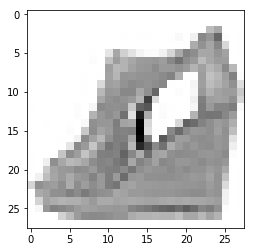

LABEL: 5

 Logistic Regression predicts 8 , while SVM predicts 5


In [16]:
LR_prediction = logreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

#the idea is that every misclassified item index is put into a list and from there I just
#randomly sample one of them
misclassified = []
for i in range(len(y_test)):
    if SVM_prediction[i] == y_test[i] and LR_prediction[i]!=y_test[i]:
        misclassified.append(i)

rand_index = misclassified[np.random.randint(len(misclassified))]
plot_input(X_test,y_test,rand_index)
print("\n Logistic Regression predicts", LR_prediction[rand_index], ", while SVM predicts", SVM_prediction[rand_index])

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by dividing each row for the number of samples in each class in order to measure the accuracy on each single class.


In [17]:
np.set_printoptions(precision=2, suppress=True,floatmode='fixed') # for better aligned printing of confusion matrix

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_true=y_test,y_pred=SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)

#normalizing by rows seems the most logical thing to do
cm_SVM = confusion_SVM.astype('float') / confusion_SVM.sum(axis=1)[:, np.newaxis]
print("\n Normalized confusion matrix SVM  \n \n", cm_SVM)

confusion_LR = skm.confusion_matrix(y_true=y_test,y_pred=LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)

cm_LR = confusion_LR.astype('float') / confusion_LR.sum(axis=1)[:, np.newaxis]
print("\n Normalized confusion matrix LR  \n \n", cm_LR)

Labels and frequencies in test set:  [2968 2970 3033 3004 3025 3030 2991 3008 2954 3017]

 Confusion matrix SVM  
 
 [[2544    2   36   96    5    2  250    0   33    0]
 [  22 2859   11   71    3    0    3    0    1    0]
 [  58    2 2345   33  341    2  232    0   20    0]
 [ 132   24   27 2654   96    0   65    0    6    0]
 [   9    3  277   86 2395    0  244    0   11    0]
 [   0    0    2    3    0 2826    0  137    9   53]
 [ 466    6  343   81  266    0 1786    0   42    1]
 [   0    0    0    0    0  100    0 2798    2  108]
 [  23    1   18   16   13   14   48   13 2807    1]
 [   0    1    0    0    0   45    0  115    0 2856]]

 Normalized confusion matrix SVM  
 
 [[0.86 0.00 0.01 0.03 0.00 0.00 0.08 0.00 0.01 0.00]
 [0.01 0.96 0.00 0.02 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.02 0.00 0.77 0.01 0.11 0.00 0.08 0.00 0.01 0.00]
 [0.04 0.01 0.01 0.88 0.03 0.00 0.02 0.00 0.00 0.00]
 [0.00 0.00 0.09 0.03 0.79 0.00 0.08 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.93 0.00 0.05 0.00 0

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


$\textbf{ANSWER}$  
The accuracies on both matrices appear to be satisfyingly high, with the majority of the labels getting a correct prediction over 80% of the times. It can be noted that the values are higher using SVM, usually by a couple of percentage points (this has already been discussed previously).
Some classes, however, have in both cases a pronounced decrease in accuracy. Such classes are for both algorithms the ones that are somewhat related with similarities of the items depicted in the images. For example, shirts are in about 15% of cases confused with T-shirts and in about 10% with pullovers (but the viceversa is not always true, since pullovers tend to be confused way more with shirts or coats rather than with T-shirts, possibly because of the long sleeves). I would assume that the arrays describing these items are very similar, just like the items themselves, which makes it harder than usual for the algorithm to make a sound prediction.
Similarity being the main reason for lower accuracies could be enforced by the fact that also boots, sneakers and sandals get confused between themselves, even if with much lower error percentages. When trying with a lower m, though, the accuracies got worse, signaling the effectiveness of a training with more data.